In [19]:
# -----------------------------------
# 0. Imports & Environment Safety
# -----------------------------------
import tensorflow as tf
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
# -----------------------------------
# 1. Load Dataset (Pima Indians Diabetes)
# -----------------------------------
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
cols = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

df = pd.read_csv(url, names=cols)

In [7]:
# -----------------------------------
# 2. Split Features and Target
# -----------------------------------
X = df.drop("Outcome", axis=1).values   # Features
y = df["Outcome"].values                # Binary target (0 or 1)

In [8]:
# -----------------------------------
# 3. Feature Scaling
# -----------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# -----------------------------------
# 4. Train-Test Split
# -----------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [10]:
# -----------------------------------
# 5. Build Binary Classification Model
# -----------------------------------
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary output
])

2026-02-09 23:42:32.844681: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2026-02-09 23:42:32.844986: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2026-02-09 23:42:32.845017: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2026-02-09 23:42:32.845456: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-02-09 23:42:32.845503: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:

# -----------------------------------
# 6. Compile Model
# -----------------------------------
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [12]:
# -----------------------------------
# 7. Train Model
# -----------------------------------
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/100


2026-02-09 23:42:58.224642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4529 - loss: 0.8173 - val_accuracy: 0.4677 - val_loss: 0.8268
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5326 - loss: 0.7252 - val_accuracy: 0.6129 - val_loss: 0.7084
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6214 - loss: 0.6545 - val_accuracy: 0.6452 - val_loss: 0.6294
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7047 - loss: 0.6068 - val_accuracy: 0.7097 - val_loss: 0.5724
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7464 - loss: 0.5705 - val_accuracy: 0.7419 - val_loss: 0.5358
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7663 - loss: 0.5472 - val_accuracy: 0.7258 - val_loss: 0.5142
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7681 - loss: 0.5299 - val_accuracy: 0.7581 - val_loss: 0.4954
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7772 - loss: 0.5155 - val_accuracy: 0.7581 - val_loss: 0.

In [13]:

# -----------------------------------
# 8. Evaluate Model
# -----------------------------------
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {acc:.3f}")


Test Accuracy: 0.714


In [14]:

# -----------------------------------
# 9. Predictions & Metrics
# -----------------------------------
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

Confusion Matrix:
[[82 18]
 [26 28]]


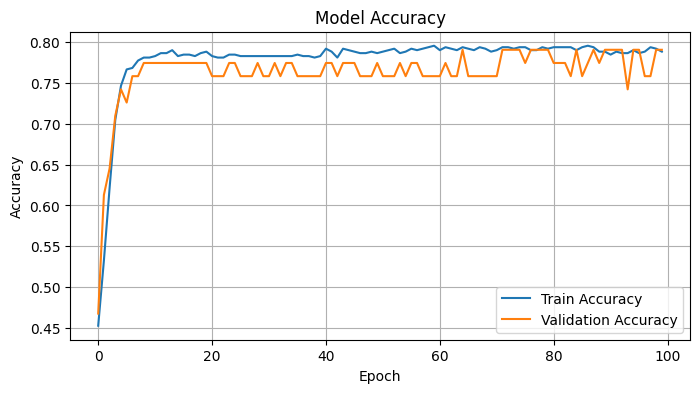

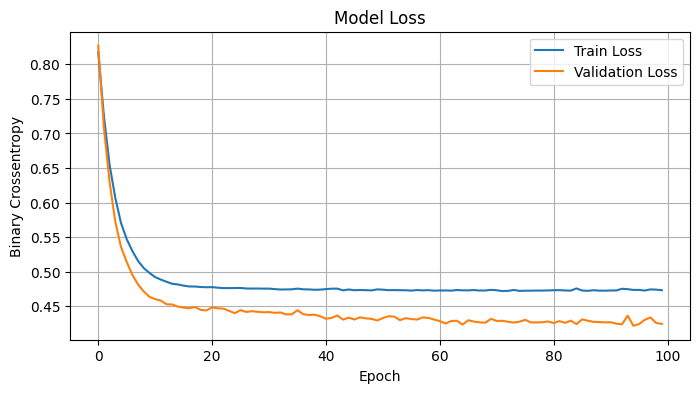

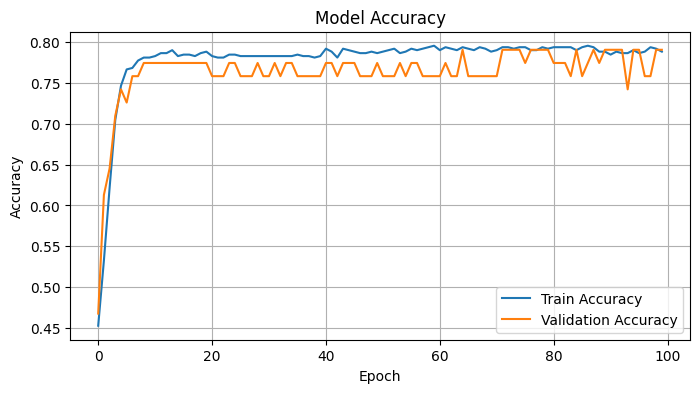

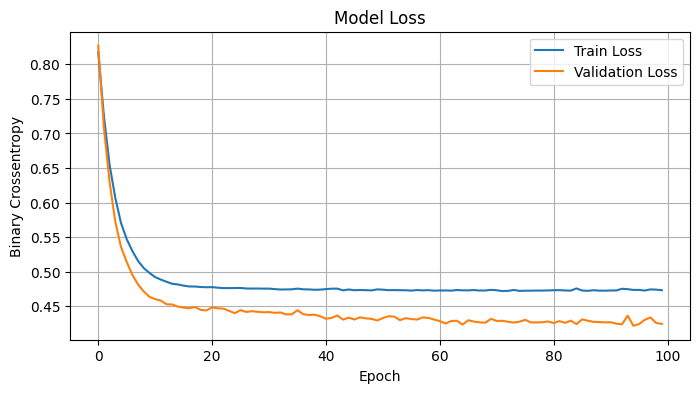

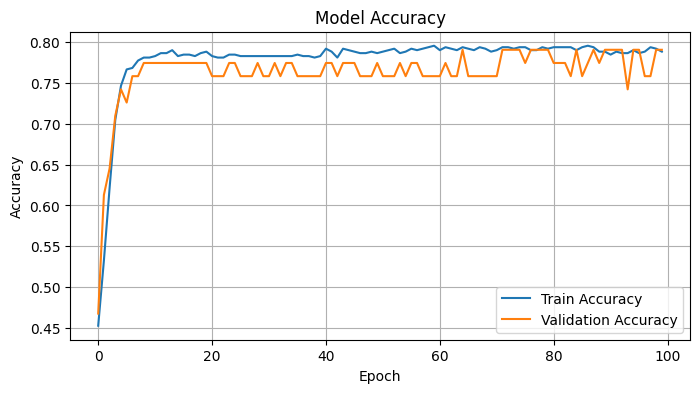

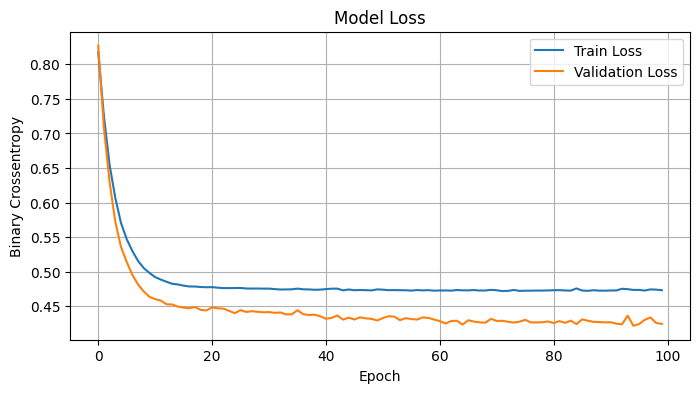

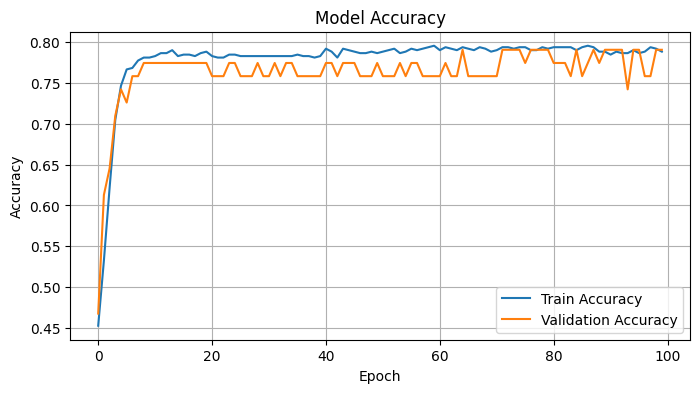

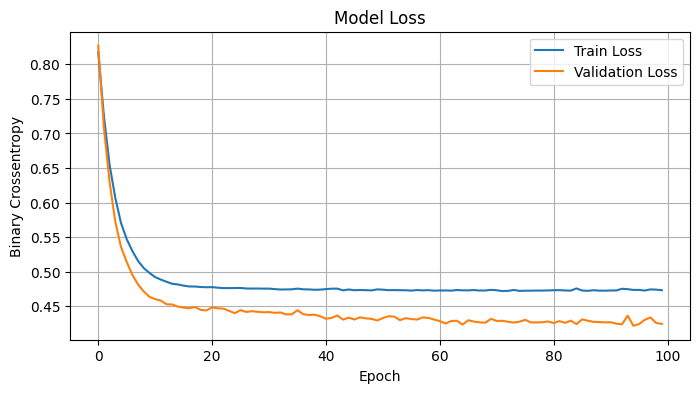

In [20]:

# -----------------------------------
# 10. Training History Plots
# -----------------------------------
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy")
plt.title("Model Loss")
plt.legend()
plt.grid(True)
plt.show()
